# Creating a Signal



The **SAMPLE RATE** determines how many data points the signal uses to represent the sine wave per second. So if the signal had a sample rate of 10 Hz and was a five second sine wave, it would have 10 * 5 = 50 data points. The **DURATION** is the length of the generated sample. W are going tod efine a function to generate a sine wave which takes in frequency, and then returns the x and y values we will need to plot the wave. Using numpy's *linspace()* function, we are generating evenly spaced values between 0 and **DURATION**. These will be our x-coordinates of the sine wave. When we apply *np.sine()*, we are calcualting the values fo the sine function at each of the x-coordinates. The result is multiplied by the frequency to amke the sine wave oscillate at that frequency. Finally, because we want our values in radians, we multiply the product by $2\pi$ to convert our product from degrees to radians. 

In [2]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100 # Hz
DURATION = 5 # seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint = False)
    frequencies = x * freq
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

Now, we have defined our function and will generate a 2 Hz sine wave that lasts 5 seconds. We will plot it below. The x-axis represents time in seconds. There are two peaks for each second of time, meaning that the sine wave oscillates twice per second. Great! Now we've generated a sine wave, but in order to produce fake data for signal processing that mimics an audio file, we will need higher frequency sine waves. We will also need to mix them. 

<function matplotlib.pyplot.show(*args, **kw)>

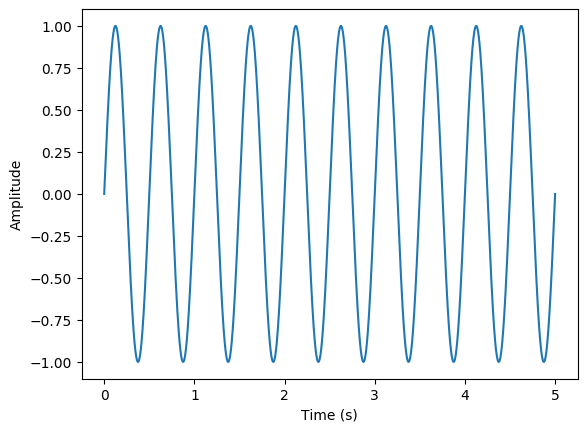

In [3]:
# generate a 2Hz sine wave, lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show

# Mixing Audio Signals

There are two steps to mixing audio signals: adding the signals together and normalizing the result. First, let's start by generating two audio signals with our sine wave function above.

In [4]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

Let's break down this code example that we gave. We generated one sine wave, representing a *nice tone* with a frequency of 400, a sample rate of 44100, and a duration of 5 seconds. These latter two parameters are taken from our constants defined above. Our second tone is a *noise tone* with the same sample rate and duration as above, but with a frequency of 4000. Since the frequency of this tone is higher than the previous one, it's pitch will also be higher. To reduce the power of this *noise tone*, we multiple it by 0.3, to have it become noisier, After adding the two tones together, we have completed the first step in mixing our audio signal. <br>

Next, we will normalize our data.

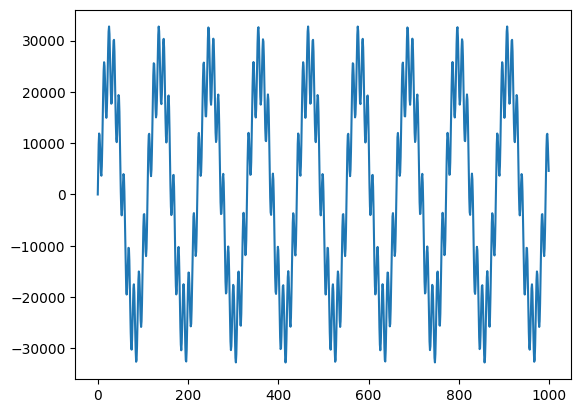

In [7]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)
plt.plot(normalized_tone[:1000])
plt.show()

In our code above, *mixed_tone* is scaled to a 16 bit integer. This datatype has a range from -32768 to 32767. When we divide the *mixed_tone* by its max value, it is scaled between -1 and 1. When we multiply it by 32767, it is scaled between -32767 and 32767, the range of its datatype. We set the code to plot only the first 1000 samples of the data to be able to more clearly see the shape of the signal. We can see this plot above. Looking at our signal, it resembles a slightly distorted sine wave. Thinking back to our two tones generated earlier, the sine wave structure we see is the 400 Hz tone that we generated, the *nice tone*, and the distortion is the 4000 Hz tone, the *noise tone*. Looking closely, we can see our distorion has the shape of a sine wave.  <br>

We can actually listen to our mixed audio file by importing our signal to a WAV file. This is done via the code below.

In [8]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

Listening to this file, we can hear a high pitched tone and a low pitched tone. Using the Fourier transform, we can remove the high pitched tone.